Peer to Peer Lending Project

In [26]:
# create histograms of numeric input variables
#from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot

#https://realpython.com/python-statistics/
import math
import statistics
import scipy.stats

#from sklearn.model_selection import train_test_split

# define the dataset location
filename = '2012-2013 Accept_Reject_Training.csv'

# load the csv file as a data frame
df = pd.read_csv(filename)
#df = pd.read_csv(filename, index_col=0)

df.head(10)

,Amount,FICO,dti,e_emp_length,c_Decision
0,35000,699,19.6100,5,1
1,15000,647,0.2342,1,0
2,35000,709,20.5500,2,1
3,15000,664,9.3600,10,1
4,6000,650,0.3438,1,0
5,8700,606,0.1260,1,0
6,20000,689,27.3400,7,1
7,6000,674,8.9300,10,1
8,35000,633,0.1500,1,0
9,18000,684,30.2400,6,1


In [27]:
# summarize the shape of the dataset
print(df.shape)

(26493, 5)


In [28]:
types = df.dtypes
print(types)

Amount            int64
FICO              int64
dti             float64
e_emp_length      int64
c_Decision        int64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6630055898>,
      dtype=object)

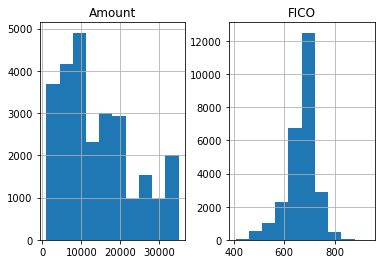

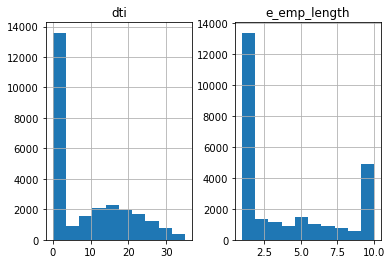

In [7]:
df.hist(column=["Amount", "FICO"])
df.hist(column=["dti", "e_emp_length"])

In [8]:
#print df.describe(column="Amount")
#average1 = df['Amount'].mean()

print('Mean Amount       - ', df['Amount'].mean())
print('Mean FICO         - ', df['FICO'].mean())
print('Mean dti          - ', df['dti'].mean())
print('Mean e_emp_length - ', df['e_emp_length'].mean())

Mean Amount       -  14149.078058355037
Mean FICO         -  670.5999320575246
Mean dti          -  8.604369490053976
Mean e_emp_length -  3.9170724342279093


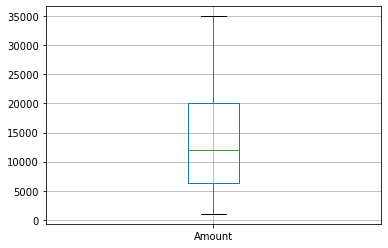

In [9]:
#Box Plot
df.boxplot(column=["Amount"])

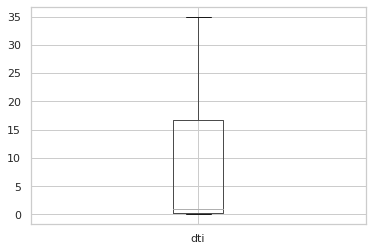

In [20]:
df.boxplot(column=["dti"])

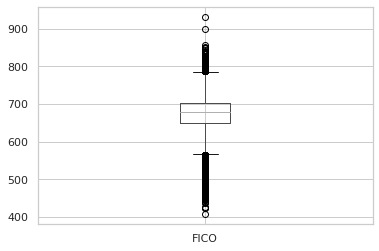

In [24]:
df.boxplot(column=["FICO"])

In [29]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
description = df.describe()
print(description)

         Amount      FICO       dti  e_emp_length  c_Decision
count  26493.00  26493.00  2.65e+04      26493.00     26493.0
mean   14149.08    670.60  8.60e+00          3.92         0.5
std     9522.04     57.11  9.92e+00          3.61         0.5
min     1000.00    407.00  2.00e-04          1.00         0.0
25%     6250.00    649.00  1.95e-01          1.00         0.0
50%    12000.00    679.00  9.45e-01          1.00         1.0
75%    20000.00    704.00  1.66e+01          7.00         1.0
max    35000.00    932.00  3.50e+01         10.00         1.0


In [30]:
# Distribution by decision
class_counts = df.groupby('c_Decision').size()
print(class_counts)

c_Decision
0    13233
1    13260
dtype: int64


In [31]:
# Pairwise Pearson correlations - Correlation Between Attributes
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              Amount   FICO    dti  e_emp_length  c_Decision
Amount         1.000  0.255  0.055         0.097       0.043
FICO           0.255  1.000  0.431         0.398       0.534
dti            0.055  0.431  1.000         0.541       0.843
e_emp_length   0.097  0.398  0.541         1.000       0.626
c_Decision     0.043  0.534  0.843         0.626       1.000


In [32]:
# Skew for each attribute
# Knowing the skew allows data preparation to correct the skew and later improve the accuracy of models
skew = df.skew()
print(skew)

Amount          0.711
FICO           -0.969
dti             0.757
e_emp_length    0.750
c_Decision     -0.002
dtype: float64


In [48]:
# Train Test Split - X: all the features and y: target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('c_Decision',axis=1), 
           df['c_Decision'], test_size=0.30)

In [49]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

X_train:         Amount  FICO     dti  e_emp_length
1184    12000   664   2.860            10
22127    3500   620   0.272             1
24702   35000   671   0.261             1
3591     3500   689  23.630             5
18260   20000   655   0.211             1
...       ...   ...     ...           ...
10975   13000   640   0.086             1
20846   15250   684  26.550             6
24139   12000   694  34.600             7
15887   10000   609   0.080             1
7071    10000   685   0.133             4

[18545 rows x 4 columns]
y_train:  1184     1
22127    0
24702    0
3591     1
18260    0
        ..
10975    0
20846    1
24139    1
15887    0
7071     0
Name: c_Decision, Length: 18545, dtype: int64


In [50]:
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_test:         Amount  FICO     dti  e_emp_length
24242   10000   655   0.353             1
14399    5000   625   0.055             1
23964    6000   674  11.890            10
20114   15250   704  22.140             9
22069   35000   653   0.134             1
...       ...   ...     ...           ...
10101   15000   472   0.114             1
3849    15000   674  26.620            10
4038     3500   701   0.151             1
10368   30000   689   0.409             1
13077   20000   699   0.342             2

[7948 rows x 4 columns]
y_test:  24242    0
14399    0
23964    1
20114    1
22069    0
        ..
10101    0
3849     1
4038     0
10368    0
13077    0
Name: c_Decision, Length: 7948, dtype: int64


In [51]:
# Training and Predicting - Let’s use Logistic Regression to train the model
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
#predictions
Predictions = logmodel.predict(X_test)

In [53]:
#Model Evaluation - precision, recall, f1-score using classification report and accuracy of model for predictions
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3981
           1       1.00      0.99      1.00      3967

   micro avg       1.00      1.00      1.00      7948
   macro avg       1.00      1.00      1.00      7948
weighted avg       1.00      1.00      1.00      7948



In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[3981    0]
 [  33 3934]]


In [60]:
from PIL import Image  
  
# creating a object  
im = Image.open('confusion_matrix.PNG')   
im.show()